In [239]:
import requests
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
df = pd.DataFrame()


for i in range(1, 7, 1):
  url = 'https://api.hh.ru/vacancies?text=data+engineer&per_page=100&only_with_salary=True&page={}'.format(i)
  df = df.append(pd.DataFrame(requests.get(url).json()['items']))#Добавляем записи в DataFrame
  print(df.shape)

(100, 28)
(200, 28)
(300, 28)
(400, 28)
(455, 28)
(455, 28)


In [3]:
df.loc[40, []]

""
40
40
40
40
40


In [4]:
df.head()

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,48151582,False,Senior data engineer (python),None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/48151582,[],"{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
1,48189880,False,Middle Spark Data Engineer (remote),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/48189880,[],"{'id': '1574063', 'name': 'ClearScale', 'url':...",{'requirement': 'We are looking for a candidat...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
2,48151583,False,Senior data engineer (Python),None,False,False,"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/48151583,[],"{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
3,48093774,False,Data Engineer,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/48093774,[],"{'id': '3590333', 'name': 'КАЗАНЬЭКСПРЕСС', 'u...","{'requirement': 'Отличная техническая база, по...",None,"{'id': 'flexible', 'name': 'Гибкий график'}",[],[],[],False
4,48164825,False,ML Engineer/Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Западный админис...",...,https://hh.ru/vacancy/48164825,[],"{'id': '5728483', 'name': 'Газарова Екатерина'...",{'requirement': 'Experience working with imagi...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False


In [5]:
df.iloc[400]

id                                                                   48094339
premium                                                                 False
name                                                    Ведущий DS/ML-инженер
department                                                               None
has_test                                                                 True
response_letter_required                                                False
area                        {'id': '1', 'name': 'Москва', 'url': 'https://...
salary                      {'from': 250000, 'to': 350000, 'currency': 'RU...
type                                       {'id': 'open', 'name': 'Открытая'}
address                                                                  None
response_url                                                             None
sort_point_distance                                                      None
published_at                                         2021-09-20T

In [6]:
df.columns

Index(['id', 'premium', 'name', 'department', 'has_test',
       'response_letter_required', 'area', 'salary', 'type', 'address',
       'response_url', 'sort_point_distance', 'published_at', 'created_at',
       'archived', 'apply_alternate_url', 'insider_interview', 'url',
       'alternate_url', 'relations', 'employer', 'snippet', 'contacts',
       'schedule', 'working_days', 'working_time_intervals',
       'working_time_modes', 'accept_temporary'],
      dtype='object')

In [7]:
df[['id', 'name', 'area', 'salary', 'employer', 'snippet', 'schedule']][1:4]

,id,name,area,salary,employer,snippet,schedule
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...","{'id': '1574063', 'name': 'ClearScale', 'url':...",{'requirement': 'We are looking for a candidat...,"{'id': 'remote', 'name': 'Удаленная работа'}"
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...","{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,"{'id': 'remote', 'name': 'Удаленная работа'}"
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...","{'id': '3590333', 'name': 'КАЗАНЬЭКСПРЕСС', 'u...","{'requirement': 'Отличная техническая база, по...","{'id': 'flexible', 'name': 'Гибкий график'}"


In [8]:
df[['id', 'name']]

,id,name
0,48151582,Senior data engineer (python)
1,48189880,Middle Spark Data Engineer (remote)
2,48151583,Senior data engineer (Python)
3,48093774,Data Engineer
4,48164825,ML Engineer/Data Scientist
...,...,...
50,47899673,React Native Developer
51,47931226,Инженер эксплуатации сети/инженер связи/систем...
52,47923614,Interconnection Manager
53,48248921,Product Manager


In [9]:
type(df[['id', 'name']])

pandas.core.frame.DataFrame

In [10]:
df[['id', 'name']][1:4]

,id,name
1,48189880,Middle Spark Data Engineer (remote)
2,48151583,Senior data engineer (Python)
3,48093774,Data Engineer


In [11]:
df.loc[:,['id', 'name', 'area', 'salary', 'employer', 'snippet', 'schedule']]

,id,name,area,salary,employer,snippet,schedule
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...","{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,"{'id': 'remote', 'name': 'Удаленная работа'}"
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...","{'id': '1574063', 'name': 'ClearScale', 'url':...",{'requirement': 'We are looking for a candidat...,"{'id': 'remote', 'name': 'Удаленная работа'}"
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...","{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,"{'id': 'remote', 'name': 'Удаленная работа'}"
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...","{'id': '3590333', 'name': 'КАЗАНЬЭКСПРЕСС', 'u...","{'requirement': 'Отличная техническая база, по...","{'id': 'flexible', 'name': 'Гибкий график'}"
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...","{'id': '5728483', 'name': 'Газарова Екатерина'...",{'requirement': 'Experience working with imagi...,"{'id': 'fullDay', 'name': 'Полный день'}"
...,...,...,...,...,...,...,...
50,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...","{'id': '773806', 'name': 'Bamboo Group', 'url'...","{'requirement': '...HTTP, REST and JSON. Famil...","{'id': 'remote', 'name': 'Удаленная работа'}"
51,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': '47042', 'name': 'Цифровой Диалог', 'ur...",{'requirement': 'технологии хPON. Желателен оп...,"{'id': 'fullDay', 'name': 'Полный день'}"
52,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...","{'id': '1697707', 'name': 'Казтехносвязь', 'ur...",{'requirement': 'Commercial experience in sale...,"{'id': 'fullDay', 'name': 'Полный день'}"
53,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...","{'id': '5425189', 'name': 'PALLI GROUP LLC', '...",{'requirement': 'Experience working with <high...,"{'id': 'fullDay', 'name': 'Полный день'}"


In [12]:
df.loc[80,['id', 'name', 'area', 'salary', 'employer', 'snippet', 'schedule']].shape #У нас несколько 80-х строк потому что нумерация строк 0-99, далее снова 0

(4, 7)

In [13]:
#Пример см.
list(df.iterrows())

[(0,
  id                                                                   48151582
  premium                                                                 False
  name                                            Senior data engineer (python)
  department                                                               None
  has_test                                                                False
  response_letter_required                                                False
  area                        {'id': '2', 'name': 'Санкт-Петербург', 'url': ...
  salary                      {'from': 4000, 'to': 6000, 'currency': 'USD', ...
  type                                       {'id': 'open', 'name': 'Открытая'}
  address                                                                  None
  response_url                                                             None
  sort_point_distance                                                      None
  published_at                     

In [14]:
df.loc[0]

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,48151582,False,Senior data engineer (python),None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/48151582,[],"{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
0,44226947,False,Senior Java Developer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 250000, 'to': 350000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/44226947,[],"{'id': '5078562', 'name': 'Scalable Solutions'...","{'requirement': 'Отличное знание Java 11+, Spr...",None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
0,48757736,False,"Senior Full Stack Engineer (React, Node.js, Mo...",None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 2500, 'to': 3000, 'currency': 'EUR', ...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/48757736,[],"{'id': '5767208', 'name': 'Hopkins', 'url': 'h...","{'requirement': 'You understand API design, <h...",None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
0,48496854,False,Product Manager (remote),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 180000, 'to': 200000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/48496854,[],"{'id': '5088555', 'name': 'SpaceK World', 'url...",{'requirement': 'Understanding methods of cond...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
0,48094339,False,Ведущий DS/ML-инженер,None,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 250000, 'to': 350000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,https://hh.ru/vacancy/48094339,[],"{'id': '3140842', 'name': 'Шпак Виктория Серге...",{'requirement': 'Отличное понимание теоретичес...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False


In [15]:
df = df.reset_index()
df

,index,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,0,48151582,False,Senior data engineer (python),None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48151582,[],"{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
1,1,48189880,False,Middle Spark Data Engineer (remote),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48189880,[],"{'id': '1574063', 'name': 'ClearScale', 'url':...",{'requirement': 'We are looking for a candidat...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
2,2,48151583,False,Senior data engineer (Python),None,False,False,"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48151583,[],"{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
3,3,48093774,False,Data Engineer,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48093774,[],"{'id': '3590333', 'name': 'КАЗАНЬЭКСПРЕСС', 'u...","{'requirement': 'Отличная техническая база, по...",None,"{'id': 'flexible', 'name': 'Гибкий график'}",[],[],[],False
4,4,48164825,False,ML Engineer/Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48164825,[],"{'id': '5728483', 'name': 'Газарова Екатерина'...",{'requirement': 'Experience working with imagi...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,50,47899673,False,React Native Developer,None,True,False,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/47899673,[],"{'id': '773806', 'name': 'Bamboo Group', 'url'...","{'requirement': '...HTTP, REST and JSON. Famil...",None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
451,51,47931226,False,Инженер эксплуатации сети/инженер связи/систем...,None,False,False,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/47931226,[],"{'id': '47042', 'name': 'Цифровой Диалог', 'ur...",{'requirement': 'технологии хPON. Желателен оп...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
452,52,47923614,False,Interconnection Manager,None,False,False,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/47923614,[],"{'id': '1697707', 'name': 'Казтехносвязь', 'ur...",{'requirement': 'Commercial experience in sale...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
453,53,48248921,False,Product Manager,None,False,False,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/vacancy/48248921,[],"{'id': '5425189', 'name': 'PALLI GROUP LLC', '...",{'requirement': 'Experience working with <high...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],

In [16]:
df.reset_index()

,level_0,index,id,premium,name,department,has_test,response_letter_required,area,salary,...,alternate_url,relations,employer,snippet,contacts,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary
0,0,0,48151582,False,Senior data engineer (python),None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",...,https://hh.ru/vacancy/48151582,[],"{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
1,1,1,48189880,False,Middle Spark Data Engineer (remote),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",...,https://hh.ru/vacancy/48189880,[],"{'id': '1574063', 'name': 'ClearScale', 'url':...",{'requirement': 'We are looking for a candidat...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
2,2,2,48151583,False,Senior data engineer (Python),None,False,False,"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",...,https://hh.ru/vacancy/48151583,[],"{'id': '4329042', 'name': 'TeamDirector', 'url...",{'requirement': 'Good communication skills. Wi...,None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
3,3,3,48093774,False,Data Engineer,None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",...,https://hh.ru/vacancy/48093774,[],"{'id': '3590333', 'name': 'КАЗАНЬЭКСПРЕСС', 'u...","{'requirement': 'Отличная техническая база, по...",None,"{'id': 'flexible', 'name': 'Гибкий график'}",[],[],[],False
4,4,4,48164825,False,ML Engineer/Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",...,https://hh.ru/vacancy/48164825,[],"{'id': '5728483', 'name': 'Газарова Екатерина'...",{'requirement': 'Experience working with imagi...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,450,50,47899673,False,React Native Developer,None,True,False,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",...,https://hh.ru/vacancy/47899673,[],"{'id': '773806', 'name': 'Bamboo Group', 'url'...","{'requirement': '...HTTP, REST and JSON. Famil...",None,"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],False
451,451,51,47931226,False,Инженер эксплуатации сети/инженер связи/систем...,None,False,False,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",...,https://hh.ru/vacancy/47931226,[],"{'id': '47042', 'name': 'Цифровой Диалог', 'ur...",{'requirement': 'технологии хPON. Желателен оп...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
452,452,52,47923614,False,Interconnection Manager,None,False,False,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",...,https://hh.ru/vacancy/47923614,[],"{'id': '1697707', 'name': 'Казтехносвязь', 'ur...",{'requirement': 'Commercial experience in sale...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False
453,453,53,48248921,False,Product Manager,None,False,False,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",...,https://hh.ru/vacancy/48248921,[],"{'id': '5425189', 'name': 'PALLI GROUP LLC', '...",{'requirement': 'Experience working with <high...,None,"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False


In [17]:
df1 = df[['id', 'name', 'area', 'salary', 'employer', 'snippet', 'schedule']]

In [59]:
df1['city'] = df1.area.apply(lambda x: x['name'])

In [19]:
df1['city'] = df1.area.apply(lambda x: x['name'])[1:4] # будут Nan везде кроме 1, 2, 3

<ipython-input-19-c9387453e91b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['city'] = df1.area.apply(lambda x: x['name'])[1:4] # будут Nan везде кроме 1, 2, 3


In [60]:
df1

,id,name,area,salary,employer,snippet,schedule,city
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [61]:
df1.area.apply(lambda x: x['name'])

0      Санкт-Петербург
1               Москва
2                 Киев
3      Санкт-Петербург
4               Москва
            ...       
450              Минск
451     Ростов-на-Дону
452           Костанай
453            Ташкент
454             Москва
Name: area, Length: 455, dtype: object

In [62]:
type(df1.area.apply(lambda x: x['name']))

pandas.core.series.Series

In [63]:
type(df1.area)

pandas.core.series.Series

In [64]:
df1.area

0      {'id': '2', 'name': 'Санкт-Петербург', 'url': ...
1      {'id': '1', 'name': 'Москва', 'url': 'https://...
2      {'id': '115', 'name': 'Киев', 'url': 'https://...
3      {'id': '2', 'name': 'Санкт-Петербург', 'url': ...
4      {'id': '1', 'name': 'Москва', 'url': 'https://...
                             ...                        
450    {'id': '1002', 'name': 'Минск', 'url': 'https:...
451    {'id': '76', 'name': 'Ростов-на-Дону', 'url': ...
452    {'id': '172', 'name': 'Костанай', 'url': 'http...
453    {'id': '2759', 'name': 'Ташкент', 'url': 'http...
454    {'id': '1', 'name': 'Москва', 'url': 'https://...
Name: area, Length: 455, dtype: object

In [65]:
df1['area']

0      {'id': '2', 'name': 'Санкт-Петербург', 'url': ...
1      {'id': '1', 'name': 'Москва', 'url': 'https://...
2      {'id': '115', 'name': 'Киев', 'url': 'https://...
3      {'id': '2', 'name': 'Санкт-Петербург', 'url': ...
4      {'id': '1', 'name': 'Москва', 'url': 'https://...
                             ...                        
450    {'id': '1002', 'name': 'Минск', 'url': 'https:...
451    {'id': '76', 'name': 'Ростов-на-Дону', 'url': ...
452    {'id': '172', 'name': 'Костанай', 'url': 'http...
453    {'id': '2759', 'name': 'Ташкент', 'url': 'http...
454    {'id': '1', 'name': 'Москва', 'url': 'https://...
Name: area, Length: 455, dtype: object

In [66]:
df1['employer'] = df1.employer.apply(lambda x: x['name'])

TypeError: string indices must be integers

In [68]:
df1['schedule'] = df1.schedule.apply(lambda x: x['id'])
df1.head()

TypeError: string indices must be integers

In [69]:
x, y = [],[]
for i, row in df1.iterrows():
  x += [row['snippet']['requirement']]
  y += [row['snippet']['responsibility']]

In [29]:
x, y = [],[]
y

[]

In [70]:
list(df1.iterrows())

[(0,
  id                                                   48151582
  name                            Senior data engineer (python)
  area        {'id': '2', 'name': 'Санкт-Петербург', 'url': ...
  salary      {'from': 4000, 'to': 6000, 'currency': 'USD', ...
  employer                                         TeamDirector
  snippet     {'requirement': 'Good communication skills. Wi...
  schedule                                               remote
  city                                          Санкт-Петербург
  Name: 0, dtype: object),
 (1,
  id                                                   48189880
  name                      Middle Spark Data Engineer (remote)
  area        {'id': '1', 'name': 'Москва', 'url': 'https://...
  salary      {'from': 5200, 'to': 7000, 'currency': 'USD', ...
  employer                                           ClearScale
  snippet     {'requirement': 'We are looking for a candidat...
  schedule                                               remote
  c

In [71]:
type(list(df1.iterrows())[0])

tuple

In [72]:
type(list(df1.iterrows())[0][1])

pandas.core.series.Series

In [73]:
list(df1.iterrows())[0][1]

id                                                   48151582
name                            Senior data engineer (python)
area        {'id': '2', 'name': 'Санкт-Петербург', 'url': ...
salary      {'from': 4000, 'to': 6000, 'currency': 'USD', ...
employer                                         TeamDirector
snippet     {'requirement': 'Good communication skills. Wi...
schedule                                               remote
city                                          Санкт-Петербург
Name: 0, dtype: object

In [74]:
type(list(df1.iterrows())[0][1]['snippet']['responsibility'])

str

In [75]:
pd.DataFrame([x, y]).shape

(2, 455)

In [76]:
pd.DataFrame([x, y])

,0,1,2,3,4,5,6,7,8,9,...,445,446,447,448,449,450,451,452,453,454
0,Good communication skills. Will be a plus: Exp...,We are looking for a candidate with 1-3 years ...,Good communication skills. Will be a plus: Exp...,"Отличная техническая база, понимание алгоритмо...",Experience working with imaging <highlighttext...,Краудфандинговую P2P платформу. Знания в облас...,Experience as a <highlighttext>data</highlight...,Высшее образование. Опыт работы от 3-х лет. Ув...,"Отличная техническая база, понимание алгоритмо...",Практический опыт участия в проектах по создан...,...,"Высшее образование (техническое, математическо...","BS/MS, or PhD degree degree in Computer Scienc...",...свободного письменного и устного общения). ...,"Среднее профессиональное, высшее техническое о...","Использование в работе Java 8, Spring (core, <...","...HTTP, REST and JSON. Familiar with Firebase...",технологии хPON. Желателен опыт работы с обору...,Commercial experience in sales or marketing (S...,Experience working with <highlighttext>data</h...,...and developing junior <highlighttext>engine...
1,TeamDirector is an American company that devel...,Collaborate with in-house and external develop...,TeamDirector is an American company that devel...,None,...diversity of hardware platforms. Provide <h...,"Сервис по скорингу и андеррайтингу, для анализ...",Analysis and development of econometric models...,Автоматизация <highlighttext>data</highlightte...,None,Работа с крупнейшими массивами данных на рынке...,...,Проектирование структуры предметной области/ви...,"Write well designed, testable, efficient code ...",Разработка инструментов тестирования и проверк...,Развитие абонентской базы. Проведение наладки ...,Развивать наш собственный DSL для разработки с...,2 Node.js <highlighttext>Engineers</highlightt...,Эксплуатация действующей сети передачи данных....,Source new sales opportunities through lead fo...,Collaborate with our <highlighttext>engineerin...,Mentor and develop junior software <highlightt...


In [77]:
pd.DataFrame([x, y]).transpose()

,0,1
0,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...
1,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...
2,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...
3,"Отличная техническая база, понимание алгоритмо...",None
4,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...
...,...,...
450,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...
451,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....
452,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...
453,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...


In [78]:
type(pd.DataFrame([x, y]).transpose())

pandas.core.frame.DataFrame

In [79]:
df2 = pd.DataFrame([x, y]).transpose().rename(columns = {0:'requirement', 1:'responsibility'})

In [80]:
df2

,requirement,responsibility
0,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...
1,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...
2,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...
3,"Отличная техническая база, понимание алгоритмо...",None
4,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...
...,...,...
450,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...
451,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....
452,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...
453,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...


In [83]:
df1.reset_index()

,index,id,name,area,salary,employer,snippet,schedule,city
0,0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...,...
450,450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [84]:
type(df1.reset_index())

pandas.core.frame.DataFrame

In [85]:
df1

,id,name,area,salary,employer,snippet,schedule,city
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [86]:
df1.reset_index().drop(columns = ['index'], inplace = True) #Здесь inplace немного бессмысленный, ибо мы 
#не сохранили в отдельной переменной результат .reset_index(). В итоге вся эта строка приводит к остутствию эффекта

# df2.reset_index().drop(columns = ['index'], inplace = True)
df1

,id,name,area,salary,employer,snippet,schedule,city
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [87]:
df1.reset_index().drop(columns = ['index'])

,id,name,area,salary,employer,snippet,schedule,city
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [88]:
df1 = df1.reset_index()
df1

,index,id,name,area,salary,employer,snippet,schedule,city
0,0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...,...
450,450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [89]:
df1.drop(columns = ['index'])

,id,name,area,salary,employer,snippet,schedule,city
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [90]:
df1.drop(columns = ['index'], inplace = True)
df1

,id,name,area,salary,employer,snippet,schedule,city
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [91]:
df1

,id,name,area,salary,employer,snippet,schedule,city
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [92]:
df1.drop(columns = ['index'], inplace = True)

KeyError: "['index'] not found in axis"

In [93]:
df1

,id,name,area,salary,employer,snippet,schedule,city
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [94]:
print(type(df1), type(df2))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [95]:
pd.concat([df1, df2], axis = 1) #Добавляем столбец
# df3 = df1.join(df2)

,id,name,area,salary,employer,snippet,schedule,city,requirement,responsibility
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург,"Отличная техническая база, понимание алгоритмо...",None
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...
...,...,...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...


In [96]:
df1.join(df2) == pd.concat([df1, df2], axis = 1)

,id,name,area,salary,employer,snippet,schedule,city,requirement,responsibility
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
450,True,True,True,True,True,True,True,True,True,True
451,True,True,True,True,True,True,True,True,True,True
452,True,True,True,True,True,True,True,True,True,True
453,True,True,True,True,True,True,True,True,True,True


In [97]:
df2.join(df1)

,requirement,responsibility,id,name,area,salary,employer,snippet,schedule,city
0,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Санкт-Петербург
1,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,{'requirement': 'We are looking for a candidat...,remote,Москва
2,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,{'requirement': 'Good communication skills. Wi...,remote,Киев
3,"Отличная техническая база, понимание алгоритмо...",None,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,"{'requirement': 'Отличная техническая база, по...",flexible,Санкт-Петербург
4,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,{'requirement': 'Experience working with imagi...,fullDay,Москва
...,...,...,...,...,...,...,...,...,...,...
450,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...","{'from': 3000, 'to': 4000, 'currency': 'USD', ...",Bamboo Group,"{'requirement': '...HTTP, REST and JSON. Famil...",remote,Минск
451,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 50000, 'to': None, 'currency': 'RUR',...",Цифровой Диалог,{'requirement': 'технологии хPON. Желателен оп...,fullDay,Ростов-на-Дону
452,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...","{'from': 350, 'to': 1500, 'currency': 'USD', '...",Казтехносвязь,{'requirement': 'Commercial experience in sale...,fullDay,Костанай
453,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...","{'from': 1000, 'to': None, 'currency': 'USD', ...",PALLI GROUP LLC,{'requirement': 'Experience working with <high...,fullDay,Ташкент


In [98]:
df3 = df1.join(df2).drop(columns = ['snippet'])
df3.head()

,id,name,area,salary,employer,schedule,city,requirement,responsibility
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,remote,Санкт-Петербург,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 5200, 'to': 7000, 'currency': 'USD', ...",ClearScale,remote,Москва,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...","{'from': 4000, 'to': 6000, 'currency': 'USD', ...",TeamDirector,remote,Киев,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 170000, 'to': 230000, 'currency': 'RU...",КАЗАНЬЭКСПРЕСС,flexible,Санкт-Петербург,"Отличная техническая база, понимание алгоритмо...",None
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 220000, 'currency': 'RU...",Газарова Екатерина,fullDay,Москва,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...


In [99]:
import re
text = "foo bar\t baz \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [100]:
def ownsplit(x):
  return [y for y in re.split('[ ,:{}]|\'from\'|\'currency\'|\'to\'|\'gross\'', x) if len(y) > 0]

In [101]:
df3['salary'].astype(str)

0      {'from': 4000, 'to': 6000, 'currency': 'USD', ...
1      {'from': 5200, 'to': 7000, 'currency': 'USD', ...
2      {'from': 4000, 'to': 6000, 'currency': 'USD', ...
3      {'from': 170000, 'to': 230000, 'currency': 'RU...
4      {'from': 160000, 'to': 220000, 'currency': 'RU...
                             ...                        
450    {'from': 3000, 'to': 4000, 'currency': 'USD', ...
451    {'from': 50000, 'to': None, 'currency': 'RUR',...
452    {'from': 350, 'to': 1500, 'currency': 'USD', '...
453    {'from': 1000, 'to': None, 'currency': 'USD', ...
454    {'from': 2000, 'to': 4500, 'currency': 'EUR', ...
Name: salary, Length: 455, dtype: object

In [102]:
example = df3['salary'].astype(str)[0]
example

"{'from': 4000, 'to': 6000, 'currency': 'USD', 'gross': True}"

In [103]:
ownsplit(example)

['4000', '6000', "'USD'", 'True']

In [104]:
df3['salary'].astype(str).apply(lambda x: ownsplit(x))

0           [4000, 6000, 'USD', True]
1           [5200, 7000, 'USD', True]
2           [4000, 6000, 'USD', True]
3       [170000, 230000, 'RUR', True]
4      [160000, 220000, 'RUR', False]
                    ...              
450        [3000, 4000, 'USD', False]
451       [50000, None, 'RUR', False]
452          [350, 1500, 'USD', True]
453        [1000, None, 'USD', False]
454         [2000, 4500, 'EUR', True]
Name: salary, Length: 455, dtype: object

In [105]:
type(df3['salary'].astype(str).apply(lambda x: ownsplit(x))[0])

list

In [106]:
df3['salary'].astype(str).apply(lambda x: ownsplit(x)).values

array([list(['4000', '6000', "'USD'", 'True']),
       list(['5200', '7000', "'USD'", 'True']),
       list(['4000', '6000', "'USD'", 'True']),
       list(['170000', '230000', "'RUR'", 'True']),
       list(['160000', '220000', "'RUR'", 'False']),
       list(['None', '100000', "'RUR'", 'True']),
       list(['None', '160000', "'RUR'", 'True']),
       list(['350000', 'None', "'RUR'", 'False']),
       list(['170000', '230000', "'RUR'", 'True']),
       list(['300000', '350000', "'RUR'", 'False']),
       list(['None', '450000', "'RUR'", 'True']),
       list(['170000', '230000', "'RUR'", 'True']),
       list(['300000', '450000', "'RUR'", 'False']),
       list(['300000', 'None', "'RUR'", 'True']),
       list(['190000', 'None', "'RUR'", 'False']),
       list(['5000', 'None', "'USD'", 'True']),
       list(['None', '3500', "'EUR'", 'True']),
       list(['4000', 'None', "'USD'", 'True']),
       list(['None', '3500', "'EUR'", 'False']),
       list(['None', '300000', "'RUR'", 'True'

In [107]:
type(df3['salary'].astype(str).apply(lambda x: ownsplit(x)).values)

numpy.ndarray

In [108]:
df3['salary'].astype(str).apply(lambda x: ownsplit(x)).values.tolist()

[['4000', '6000', "'USD'", 'True'],
 ['5200', '7000', "'USD'", 'True'],
 ['4000', '6000', "'USD'", 'True'],
 ['170000', '230000', "'RUR'", 'True'],
 ['160000', '220000', "'RUR'", 'False'],
 ['None', '100000', "'RUR'", 'True'],
 ['None', '160000', "'RUR'", 'True'],
 ['350000', 'None', "'RUR'", 'False'],
 ['170000', '230000', "'RUR'", 'True'],
 ['300000', '350000', "'RUR'", 'False'],
 ['None', '450000', "'RUR'", 'True'],
 ['170000', '230000', "'RUR'", 'True'],
 ['300000', '450000', "'RUR'", 'False'],
 ['300000', 'None', "'RUR'", 'True'],
 ['190000', 'None', "'RUR'", 'False'],
 ['5000', 'None', "'USD'", 'True'],
 ['None', '3500', "'EUR'", 'True'],
 ['4000', 'None', "'USD'", 'True'],
 ['None', '3500', "'EUR'", 'False'],
 ['None', '300000', "'RUR'", 'True'],
 ['None', '250000', "'RUR'", 'False'],
 ['400000', '500000', "'KZT'", 'False'],
 ['8000', 'None', "'USD'", 'True'],
 ['6000', 'None', "'USD'", 'True'],
 ['3000', 'None', "'EUR'", 'True'],
 ['250000', 'None', "'RUR'", 'False'],
 ['5500',

In [110]:
# df3['salary'].astype(str).str.split('\'', expand = True)

df4 = pd.DataFrame(df3['salary'].astype(str).apply(lambda x: ownsplit(x)).values.tolist(), columns = ['from', 'to', 'currency', 'gross'])
df4

,from,to,currency,gross
0,4000,6000,'USD',True
1,5200,7000,'USD',True
2,4000,6000,'USD',True
3,170000,230000,'RUR',True
4,160000,220000,'RUR',False
...,...,...,...,...
450,3000,4000,'USD',False
451,50000,None,'RUR',False
452,350,1500,'USD',True
453,1000,None,'USD',False


In [111]:
# list(df3['salary'].astype(str).apply(lambda x: pd.DataFrame(ownsplit(x)).transpose()))

In [112]:
# list(df3['salary'].astype(str))

In [113]:
df3.join(df4).drop(columns=['salary'], axis=1) == df3.join(df4).drop(columns=['salary'])

,id,name,area,employer,schedule,city,requirement,responsibility,from,to,currency,gross
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,False,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
450,True,True,True,True,True,True,True,True,True,True,True,True
451,True,True,True,True,True,True,True,True,True,True,True,True
452,True,True,True,True,True,True,True,True,True,True,True,True
453,True,True,True,True,True,True,True,True,True,True,True,True


In [114]:
df5 = df3.join(df4).drop(columns=['salary'], axis=1)#axis - не играет роли тут
df5

,id,name,area,employer,schedule,city,requirement,responsibility,from,to,currency,gross
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",TeamDirector,remote,Санкт-Петербург,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...",ClearScale,remote,Москва,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...,5200,7000,'USD',True
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...",TeamDirector,remote,Киев,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",КАЗАНЬЭКСПРЕСС,flexible,Санкт-Петербург,"Отличная техническая база, понимание алгоритмо...",None,170000,230000,'RUR',True
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...",Газарова Екатерина,fullDay,Москва,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...,160000,220000,'RUR',False
...,...,...,...,...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...",Bamboo Group,remote,Минск,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...,3000,4000,'USD',False
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...",Цифровой Диалог,fullDay,Ростов-на-Дону,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....,50000,None,'RUR',False
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...",Казтехносвязь,fullDay,Костанай,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...,350,1500,'USD',True
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...",PALLI GROUP LLC,fullDay,Ташкент,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...,1000,None,'USD',False


In [115]:
df5['from']

0        4000
1        5200
2        4000
3      170000
4      160000
        ...  
450      3000
451     50000
452       350
453      1000
454      2000
Name: from, Length: 455, dtype: object

In [116]:
df5['from'] == None

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Name: from, Length: 455, dtype: bool

In [117]:
np.where(df5['from'] == 'None', df5['to'], df5['from'])

array(['4000', '5200', '4000', '170000', '160000', '100000', '160000',
       '350000', '170000', '300000', '450000', '170000', '300000',
       '300000', '190000', '5000', '3500', '4000', '3500', '300000',
       '250000', '400000', '8000', '6000', '3000', '250000', '5500',
       '5000', '4000', '3000', '4000', '10000', '5000', '10000', '80000',
       '1500', '230000', '6500', '100000', '5500', '4000', '5500', '3950',
       '5500', '4000', '6500', '80000', '8000', '4500', '2000', '4000',
       '200000', '1800', '5000', '200000', '8000', '120000', '8000',
       '250000', '3500', '6400', '45000', '1800', '6000', '120000',
       '6400', '150000', '3700', '6000', '90000', '3000', '3500',
       '300000', '1600', '150000', '3000', '3000', '3000', '3000', '5000',
       '1000', '400000', '5000', '5000', '100000', '220000', '1700',
       '4000', '2000', '3500', '45000', '100000', '200000', '150000',
       '1500', '50000', '3500', '4800', '4000', '1000', '250000', '2000',
       '4000

In [119]:
type(np.where(df5['from'] == 'None', df5['to'], df5['from'])[0])

str

In [120]:
from_ = [int(x) for x in np.where(df5['from'] == 'None', df5['to'], df5['from'])]
to_ = [int(x) for x in np.where(df5['to'] == 'None', df5['from'], df5['to'])]

In [121]:
df5['salary'] = [np.mean([x, y]) for x,y in zip(from_, to_)]
df5

,id,name,area,employer,schedule,city,requirement,responsibility,from,to,currency,gross,salary
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",TeamDirector,remote,Санкт-Петербург,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...",ClearScale,remote,Москва,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...,5200,7000,'USD',True,6100.0
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...",TeamDirector,remote,Киев,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",КАЗАНЬЭКСПРЕСС,flexible,Санкт-Петербург,"Отличная техническая база, понимание алгоритмо...",None,170000,230000,'RUR',True,200000.0
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...",Газарова Екатерина,fullDay,Москва,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...,160000,220000,'RUR',False,190000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...",Bamboo Group,remote,Минск,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...,3000,4000,'USD',False,3500.0
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...",Цифровой Диалог,fullDay,Ростов-на-Дону,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....,50000,None,'RUR',False,50000.0
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...",Казтехносвязь,fullDay,Костанай,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...,350,1500,'USD',True,925.0
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...",PALLI GROUP LLC,fullDay,Ташкент,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...,1000,None,'USD',False,1000.0


In [122]:
df5['currency']

0      'USD'
1      'USD'
2      'USD'
3      'RUR'
4      'RUR'
       ...  
450    'USD'
451    'RUR'
452    'USD'
453    'USD'
454    'EUR'
Name: currency, Length: 455, dtype: object

In [123]:
df5['currency'].unique()

array(["'USD'", "'RUR'", "'EUR'", "'KZT'", "'BYR'", "'UZS'", "'UAH'"],
      dtype=object)

In [125]:
df5['currency'].unique().tolist()

["'USD'", "'RUR'", "'EUR'", "'KZT'", "'BYR'", "'UZS'", "'UAH'"]

In [126]:
cur = [ 71.63, 1, 82.92, 0.17, 29.02, 0.006, 2.72 ]
currencies = dict(zip(df5['currency'].unique().tolist(), cur))

In [127]:
currencies

{"'USD'": 71.63,
 "'RUR'": 1,
 "'EUR'": 82.92,
 "'KZT'": 0.17,
 "'BYR'": 29.02,
 "'UZS'": 0.006,
 "'UAH'": 2.72}

In [130]:
df5.currency.apply(lambda x: currencies[x])

0      71.63
1      71.63
2      71.63
3       1.00
4       1.00
       ...  
450    71.63
451     1.00
452    71.63
453    71.63
454    82.92
Name: currency, Length: 455, dtype: float64

In [131]:
df5.currency.apply(lambda x: currencies[x]) * df5['salary']

0      358150.00
1      436943.00
2      358150.00
3      200000.00
4      190000.00
         ...    
450    250705.00
451     50000.00
452     66257.75
453     71630.00
454    269490.00
Length: 455, dtype: float64

In [132]:
type(df5['salary'])

pandas.core.series.Series

In [133]:
df5['clean_salary_in_RUR'] = df5.currency.apply(lambda x: currencies[x]) * df5['salary'] * np.where(df5['gross'] == 'True' , 0.87, 1)

In [134]:
# df5.drop(columns = ['clean salary in RUR'], inplace = True)
df5

,id,name,area,employer,schedule,city,requirement,responsibility,from,to,currency,gross,salary,clean_salary_in_RUR
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",TeamDirector,remote,Санкт-Петербург,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0,311590.5000
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...",ClearScale,remote,Москва,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...,5200,7000,'USD',True,6100.0,380140.4100
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...",TeamDirector,remote,Киев,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0,311590.5000
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",КАЗАНЬЭКСПРЕСС,flexible,Санкт-Петербург,"Отличная техническая база, понимание алгоритмо...",None,170000,230000,'RUR',True,200000.0,174000.0000
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...",Газарова Екатерина,fullDay,Москва,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...,160000,220000,'RUR',False,190000.0,190000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...",Bamboo Group,remote,Минск,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...,3000,4000,'USD',False,3500.0,250705.0000
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...",Цифровой Диалог,fullDay,Ростов-на-Дону,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....,50000,None,'RUR',False,50000.0,50000.0000
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...",Казтехносвязь,fullDay,Костанай,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...,350,1500,'USD',True,925.0,57644.2425
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...",PALLI GROUP LLC,fullDay,Ташкент,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...,1000,None,'USD',False,1000.0,71630.0000


In [135]:
import seaborn as sns


/home/ivan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clean_salary_in_RUR', ylabel='city'>

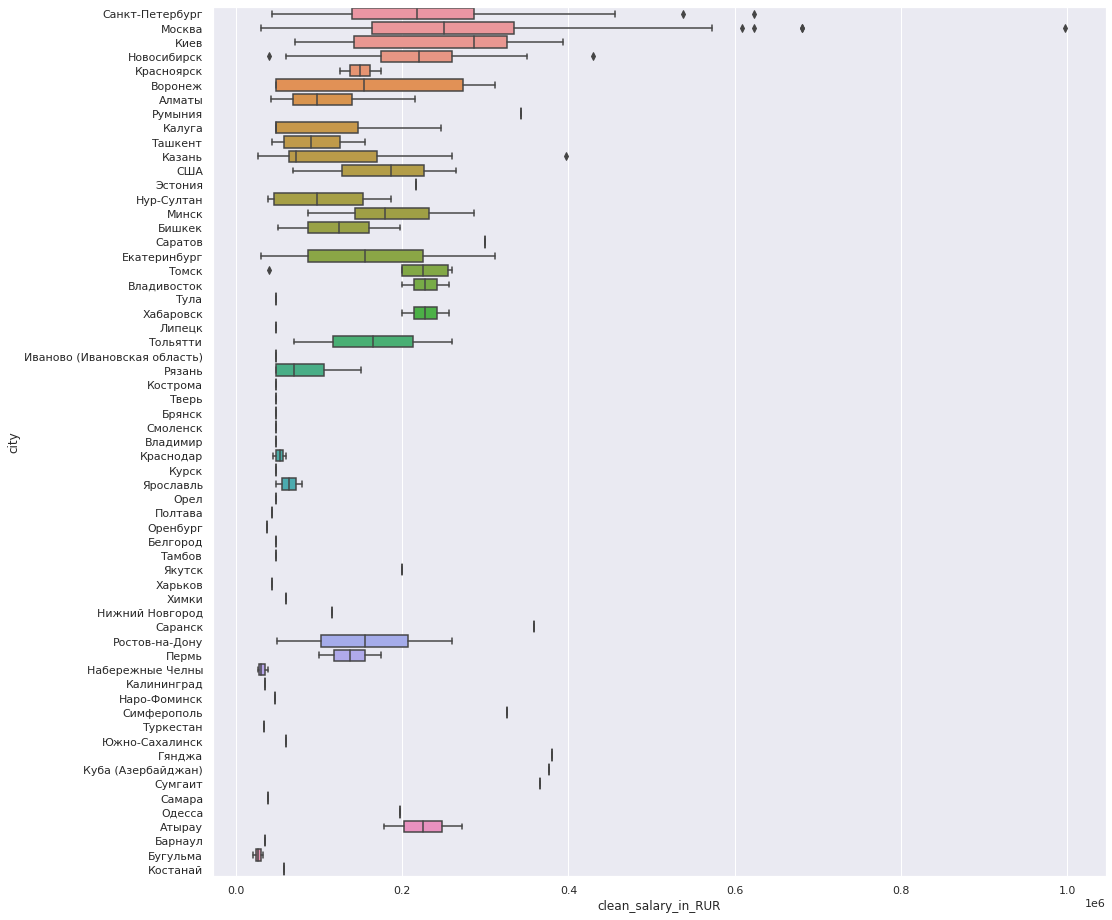

In [161]:
plt.figure(figsize=(16,16))
# sns.set_theme(rc={'figure.figsize': (16,16)})
sns.boxplot(df5['clean_salary_in_RUR'], df5['city'])

In [148]:
df5['city']

0      Санкт-Петербург
1               Москва
2                 Киев
3      Санкт-Петербург
4               Москва
            ...       
450              Минск
451     Ростов-на-Дону
452           Костанай
453            Ташкент
454             Москва
Name: city, Length: 455, dtype: object

In [150]:
df5[df5['city'] == 'Красноярск']

,id,name,area,employer,schedule,city,requirement,responsibility,from,to,currency,gross,salary,clean_salary_in_RUR
11,48087172,Data Engineer,"{'id': '54', 'name': 'Красноярск', 'url': 'htt...",КАЗАНЬЭКСПРЕСС,flexible,Красноярск,"Отличная техническая база, понимание алгоритмо...",None,170000,230000,'RUR',True,200000.0,174000.0
143,48166358,Operations head (ASIC майнеры),"{'id': '54', 'name': 'Красноярск', 'url': 'htt...",ЧАСТНАЯ КОМПАНИЯ ATLAS TECHNOLOGY KA LTD.,fullDay,Красноярск,College degree or above. Major in computer or ...,Responsible for the daily operation and manage...,None,2000,'USD',True,2000.0,124636.2


In [156]:
df5[(df5['city'] == 'Москва') & (df5['clean_salary_in_RUR'] > 590000) ]

,id,name,area,employer,schedule,city,requirement,responsibility,from,to,currency,gross,salary,clean_salary_in_RUR
31,46798531,Senior Java Developer - Core Platform (to Canada),"{'id': '1', 'name': 'Москва', 'url': 'https://...",Behavox,fullDay,Москва,Hands-on experience with any of big-<highlight...,Design complex scalable and reliable server-si...,10000,None,'USD',True,10000.0,623181.0
296,45106522,Java Trading Developer,"{'id': '1', 'name': 'Москва', 'url': 'https://...",LATOKEN,remote,Москва,"Experience with Spring Framework (Core, Messag...","Order management: Support limit, stop-limit or...",5000,12000,'USD',False,8500.0,608855.0
334,48393018,Chief Technology Officer (CTO),"{'id': '1', 'name': 'Москва', 'url': 'https://...",ГК «ВИЗАВИ Консалт»,fullDay,Москва,Minimum Bachelors Degree Level Education in Sc...,Housing allowance. Lease car. Mobile phone and...,9000,10000,'USD',False,9500.0,680485.0
401,48075151,"Product Architect, Trilogy (Remote)","{'id': '1', 'name': 'Москва', 'url': 'https://...",Crossover,remote,Москва,"...them with clear, logical thinking. A univer...",This is a strategic technical design position ...,16000,None,'USD',True,16000.0,997089.6
424,48060669,Solutions Architect (Europe and Israel),"{'id': '1', 'name': 'Москва', 'url': 'https://...",Кадровое агентство Даподбор,remote,Москва,Big <highlighttext>Data</highlighttext> / Anal...,You will be the go-to person for driving tool ...,4000,15000,'USD',False,9500.0,680485.0


In [185]:
def find_region_and_country(x):
    last_name = None
    x = requests.get(x['url']).json()
    while(x['parent_id'] != None):
        last_name = x['name']
        x = requests.get('https://api.hh.ru/areas/' + x['parent_id']).json()
    return last_name, x['name']

In [195]:
df5.area[0]['url']

'https://api.hh.ru/areas/2'

In [198]:
x = requests.get(df5.area[0]['url']).json()
x

{'id': '2', 'parent_id': '113', 'name': 'Санкт-Петербург', 'areas': []}

In [199]:
x['parent_id']

'113'

In [205]:
requests.get('https://api.hh.ru/areas/' + x['parent_id']).json()

{'id': '113',
 'parent_id': None,
 'name': 'Россия',
 'areas': [{'id': '1620',
   'parent_id': '113',
   'name': 'Республика Марий Эл',
   'areas': [{'id': '4228',
     'parent_id': '1620',
     'name': 'Виловатово',
     'areas': []},
    {'id': '1621', 'parent_id': '1620', 'name': 'Волжск', 'areas': []},
    {'id': '1622', 'parent_id': '1620', 'name': 'Звенигово', 'areas': []},
    {'id': '4229', 'parent_id': '1620', 'name': 'Знаменский', 'areas': []},
    {'id': '61', 'parent_id': '1620', 'name': 'Йошкар-Ола', 'areas': []},
    {'id': '4230', 'parent_id': '1620', 'name': 'Кельмаксола', 'areas': []},
    {'id': '4231', 'parent_id': '1620', 'name': 'Килемары', 'areas': []},
    {'id': '1623', 'parent_id': '1620', 'name': 'Козьмодемьянск', 'areas': []},
    {'id': '4232',
     'parent_id': '1620',
     'name': 'Красногорский (Республика Марий Эл)',
     'areas': []},
    {'id': '4233',
     'parent_id': '1620',
     'name': 'Краснооктябрьский',
     'areas': []},
    {'id': '4234', 'pa

In [206]:
find_region_and_country(df5.area[0])

('Санкт-Петербург', 'Россия')

In [207]:
df5['tmp'] = df5.area.apply(find_region_and_country)
df5

,id,name,area,employer,schedule,city,requirement,responsibility,from,to,currency,gross,salary,clean_salary_in_RUR,tmp
0,48151582,Senior data engineer (python),"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",TeamDirector,remote,Санкт-Петербург,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0,311590.5000,"(Санкт-Петербург, Россия)"
1,48189880,Middle Spark Data Engineer (remote),"{'id': '1', 'name': 'Москва', 'url': 'https://...",ClearScale,remote,Москва,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...,5200,7000,'USD',True,6100.0,380140.4100,"(Москва, Россия)"
2,48151583,Senior data engineer (Python),"{'id': '115', 'name': 'Киев', 'url': 'https://...",TeamDirector,remote,Киев,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0,311590.5000,"(Киев, Украина)"
3,48093774,Data Engineer,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...",КАЗАНЬЭКСПРЕСС,flexible,Санкт-Петербург,"Отличная техническая база, понимание алгоритмо...",None,170000,230000,'RUR',True,200000.0,174000.0000,"(Санкт-Петербург, Россия)"
4,48164825,ML Engineer/Data Scientist,"{'id': '1', 'name': 'Москва', 'url': 'https://...",Газарова Екатерина,fullDay,Москва,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...,160000,220000,'RUR',False,190000.0,190000.0000,"(Москва, Россия)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,"{'id': '1002', 'name': 'Минск', 'url': 'https:...",Bamboo Group,remote,Минск,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...,3000,4000,'USD',False,3500.0,250705.0000,"(Минск, Беларусь)"
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...",Цифровой Диалог,fullDay,Ростов-на-Дону,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....,50000,None,'RUR',False,50000.0,50000.0000,"(Ростовская область, Россия)"
452,47923614,Interconnection Manager,"{'id': '172', 'name': 'Костанай', 'url': 'http...",Казтехносвязь,fullDay,Костанай,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...,350,1500,'USD',True,925.0,57644.2425,"(Костанай, Казахстан)"
453,48248921,Product Manager,"{'id': '2759', 'name': 'Ташкент', 'url': 'http...",PALLI GROUP LLC,fullDay,Ташкент,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...,1000,None,'USD',False,1000.0,71630.0000,"(Ташкент, Узбекистан)"


In [211]:
df5.drop(columns=['area'], inplace=True)
df5

,id,name,employer,schedule,city,requirement,responsibility,from,to,currency,gross,salary,clean_salary_in_RUR,tmp
0,48151582,Senior data engineer (python),TeamDirector,remote,Санкт-Петербург,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0,311590.5000,"(Санкт-Петербург, Россия)"
1,48189880,Middle Spark Data Engineer (remote),ClearScale,remote,Москва,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...,5200,7000,'USD',True,6100.0,380140.4100,"(Москва, Россия)"
2,48151583,Senior data engineer (Python),TeamDirector,remote,Киев,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0,311590.5000,"(Киев, Украина)"
3,48093774,Data Engineer,КАЗАНЬЭКСПРЕСС,flexible,Санкт-Петербург,"Отличная техническая база, понимание алгоритмо...",None,170000,230000,'RUR',True,200000.0,174000.0000,"(Санкт-Петербург, Россия)"
4,48164825,ML Engineer/Data Scientist,Газарова Екатерина,fullDay,Москва,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...,160000,220000,'RUR',False,190000.0,190000.0000,"(Москва, Россия)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,Bamboo Group,remote,Минск,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...,3000,4000,'USD',False,3500.0,250705.0000,"(Минск, Беларусь)"
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,Цифровой Диалог,fullDay,Ростов-на-Дону,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....,50000,None,'RUR',False,50000.0,50000.0000,"(Ростовская область, Россия)"
452,47923614,Interconnection Manager,Казтехносвязь,fullDay,Костанай,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...,350,1500,'USD',True,925.0,57644.2425,"(Костанай, Казахстан)"
453,48248921,Product Manager,PALLI GROUP LLC,fullDay,Ташкент,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...,1000,None,'USD',False,1000.0,71630.0000,"(Ташкент, Узбекистан)"


In [216]:
df5['region'] = df5.tmp.apply(lambda x: x[0])
df5['country'] = df5.tmp.apply(lambda x: x[1])
df5.drop(columns=['tmp'], inplace=True)

AttributeError: 'DataFrame' object has no attribute 'tmp'

In [217]:
df5

,id,name,employer,schedule,city,requirement,responsibility,from,to,currency,gross,salary,clean_salary_in_RUR,region,country
0,48151582,Senior data engineer (python),TeamDirector,remote,Санкт-Петербург,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0,311590.5000,Санкт-Петербург,Россия
1,48189880,Middle Spark Data Engineer (remote),ClearScale,remote,Москва,We are looking for a candidate with 1-3 years ...,Collaborate with in-house and external develop...,5200,7000,'USD',True,6100.0,380140.4100,Москва,Россия
2,48151583,Senior data engineer (Python),TeamDirector,remote,Киев,Good communication skills. Will be a plus: Exp...,TeamDirector is an American company that devel...,4000,6000,'USD',True,5000.0,311590.5000,Киев,Украина
3,48093774,Data Engineer,КАЗАНЬЭКСПРЕСС,flexible,Санкт-Петербург,"Отличная техническая база, понимание алгоритмо...",None,170000,230000,'RUR',True,200000.0,174000.0000,Санкт-Петербург,Россия
4,48164825,ML Engineer/Data Scientist,Газарова Екатерина,fullDay,Москва,Experience working with imaging <highlighttext...,...diversity of hardware platforms. Provide <h...,160000,220000,'RUR',False,190000.0,190000.0000,Москва,Россия
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,47899673,React Native Developer,Bamboo Group,remote,Минск,"...HTTP, REST and JSON. Familiar with Firebase...",2 Node.js <highlighttext>Engineers</highlightt...,3000,4000,'USD',False,3500.0,250705.0000,Минск,Беларусь
451,47931226,Инженер эксплуатации сети/инженер связи/систем...,Цифровой Диалог,fullDay,Ростов-на-Дону,технологии хPON. Желателен опыт работы с обору...,Эксплуатация действующей сети передачи данных....,50000,None,'RUR',False,50000.0,50000.0000,Ростовская область,Россия
452,47923614,Interconnection Manager,Казтехносвязь,fullDay,Костанай,Commercial experience in sales or marketing (S...,Source new sales opportunities through lead fo...,350,1500,'USD',True,925.0,57644.2425,Костанай,Казахстан
453,48248921,Product Manager,PALLI GROUP LLC,fullDay,Ташкент,Experience working with <highlighttext>data</h...,Collaborate with our <highlighttext>engineerin...,1000,None,'USD',False,1000.0,71630.0000,Ташкент,Узбекистан


In [218]:
vector = TfidfVectorizer()

In [219]:
df5.name

0                          Senior data engineer (python)
1                    Middle Spark Data Engineer (remote)
2                          Senior data engineer (Python)
3                                          Data Engineer
4                             ML Engineer/Data Scientist
                             ...                        
450                               React Native Developer
451    Инженер эксплуатации сети/инженер связи/систем...
452                              Interconnection Manager
453                                      Product Manager
454                                    Software Engineer
Name: name, Length: 455, dtype: object

In [220]:
vector.fit_transform(df5.name).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [221]:
vector.get_feature_names()

['acquisition',
 'admission',
 'advocate',
 'afc',
 'ai',
 'algorithms',
 'also',
 'analysis',
 'analyst',
 'analytics',
 'ancillary',
 'and',
 'android',
 'angular',
 'api',
 'application',
 'applications',
 'apps',
 'architect',
 'architector',
 'architecture',
 'arenadata',
 'asic',
 'associate',
 'automation',
 'availability',
 'aws',
 'azure',
 'b2b',
 'ba',
 'back',
 'backend',
 'backup',
 'bi',
 'big',
 'bigdata',
 'bioinformatics',
 'blockchain',
 'business',
 'canada',
 'center',
 'chain',
 'chairman',
 'chief',
 'ci',
 'cis',
 'client',
 'cloud',
 'company',
 'computer',
 'configuration',
 'controller',
 'coordinator',
 'core',
 'crypto',
 'cto',
 'cube',
 'customer',
 'cybersecurity',
 'cyprus',
 'data',
 'database',
 'dataengineer',
 'datalore',
 'dba',
 'designer',
 'desktop',
 'developer',
 'development',
 'devops',
 'dex',
 'director',
 'disaster',
 'distributed',
 'django',
 'document',
 'ds',
 'dwh',
 'ee',
 'electronics',
 'emerging',
 'employment',
 'end',
 'engine',

In [222]:
df6 = pd.DataFrame(vector.fit_transform(df5.name).toarray(), columns=vector.get_feature_names())
df6

,acquisition,admission,advocate,afc,ai,algorithms,also,analysis,analyst,analytics,...,услуг,финансовый,финтех,хранилищ,цод,эксплуатации,электроснабжения,энд,эффективности,языка
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.362802,0.0,0.0,0.0,0.0
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [223]:
df6[df6['acquisition'] > 0]

,acquisition,admission,advocate,afc,ai,algorithms,also,analysis,analyst,analytics,...,услуг,финансовый,финтех,хранилищ,цод,эксплуатации,электроснабжения,энд,эффективности,языка
317,0.598859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
df5.iloc[317]

id                                                              46780997
name                                   Product manager, User Acquisition
employer                                                           Brane
schedule                                                          remote
city                                                     Санкт-Петербург
requirement            ...be a plus. Excellent proficiency in English...
responsibility         Perform in-depth <highlighttext>data</highligh...
from                                                              100000
to                                                                  None
currency                                                           'RUR'
gross                                                               True
salary                                                          100000.0
clean_salary_in_RUR                                              87000.0
region                                             

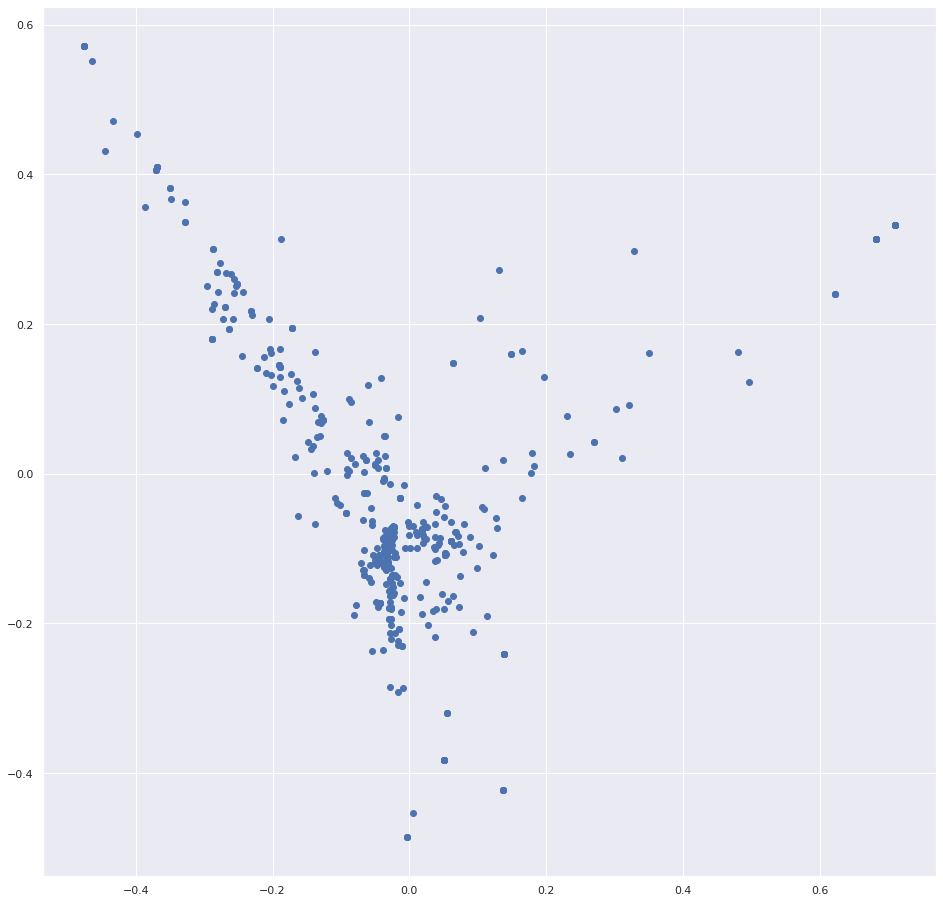

In [249]:
pca = PCA(n_components=2)
coords = pca.fit_transform(df6)
plt.scatter(coords[:, 0], coords[:, 1])

In [251]:
type(coords)

numpy.ndarray

In [260]:
len(coords)

455

In [252]:
coords

array([[-6.33221210e-02,  1.79033407e-02],
       [-8.20961583e-03, -1.65737375e-01],
       [-6.33221210e-02,  1.79033407e-02],
       [ 1.39158597e-01, -2.41141167e-01],
       [ 5.14082608e-02, -1.81234573e-01],
       [ 1.39158597e-01, -2.41141167e-01],
       [-1.17732481e-02, -1.85482662e-01],
       [ 1.14050108e-01, -1.90465929e-01],
       [ 1.39158597e-01, -2.41141167e-01],
       [ 7.19773948e-02, -1.78325926e-01],
       [ 1.39158597e-01, -2.41141167e-01],
       [ 1.39158597e-01, -2.41141167e-01],
       [-1.06458919e-01, -3.95019963e-02],
       [-4.58825981e-02, -1.78364136e-01],
       [ 4.82884483e-02, -1.61119896e-01],
       [-5.50715371e-02, -6.92301615e-02],
       [ 6.36765396e-02, -1.64092916e-01],
       [-7.78631068e-02, -1.75724896e-01],
       [ 1.28825137e-01, -7.28605082e-02],
       [-2.04545829e-01,  2.06918188e-01],
       [ 3.95855390e-02, -1.81049972e-01],
       [ 1.39158597e-01, -2.41141167e-01],
       [ 1.82040261e-02, -7.39645420e-02],
       [-5.

In [258]:
coords[1:3, 0]

array([-0.00820962, -0.06332212])

In [259]:
coords[:, 0]

array([-6.33221210e-02, -8.20961583e-03, -6.33221210e-02,  1.39158597e-01,
        5.14082608e-02,  1.39158597e-01, -1.17732481e-02,  1.14050108e-01,
        1.39158597e-01,  7.19773948e-02,  1.39158597e-01,  1.39158597e-01,
       -1.06458919e-01, -4.58825981e-02,  4.82884483e-02, -5.50715371e-02,
        6.36765396e-02, -7.78631068e-02,  1.28825137e-01, -2.04545829e-01,
        3.95855390e-02,  1.39158597e-01,  1.82040261e-02, -5.01421166e-02,
        1.26117577e-01,  3.64342229e-02, -4.45456695e-01,  2.51385670e-02,
        6.38419937e-02, -2.81164295e-01,  6.38419937e-02, -2.31786451e-01,
       -3.28515879e-01, -2.31786451e-01,  9.29848297e-02, -6.70598834e-02,
       -3.73234541e-02,  5.48220727e-02,  2.35670509e-01, -3.70233931e-02,
       -3.71017553e-01, -3.86318356e-01,  1.65394997e-01, -3.59379206e-02,
       -6.77585558e-02,  5.48220727e-02,  5.69562242e-02,  1.97128333e-02,
        1.03434876e-02, -1.87842703e-01, -1.37437146e-01, -2.02324924e-01,
        1.84787419e-02, -

In [247]:
#Ниже - просто практика (не ДЗ)

In [237]:
np.linspace(0, 1, count_colors)

array([0.        , 0.01785714, 0.03571429, 0.05357143, 0.07142857,
       0.08928571, 0.10714286, 0.125     , 0.14285714, 0.16071429,
       0.17857143, 0.19642857, 0.21428571, 0.23214286, 0.25      ,
       0.26785714, 0.28571429, 0.30357143, 0.32142857, 0.33928571,
       0.35714286, 0.375     , 0.39285714, 0.41071429, 0.42857143,
       0.44642857, 0.46428571, 0.48214286, 0.5       , 0.51785714,
       0.53571429, 0.55357143, 0.57142857, 0.58928571, 0.60714286,
       0.625     , 0.64285714, 0.66071429, 0.67857143, 0.69642857,
       0.71428571, 0.73214286, 0.75      , 0.76785714, 0.78571429,
       0.80357143, 0.82142857, 0.83928571, 0.85714286, 0.875     ,
       0.89285714, 0.91071429, 0.92857143, 0.94642857, 0.96428571,
       0.98214286, 1.        ])

In [236]:
len(np.linspace(0, 1, count_colors))

57

In [231]:
df5.region.value_counts()

Москва                      203
Санкт-Петербург              75
Новосибирская область        21
Минск                        17
Киев                         15
Республика Татарстан         13
Алматы                        7
Свердловская область          7
Ташкент                       6
Нур-Султан                    6
Томская область               6
Рязанская область             4
Воронежская область           4
США                           3
Калужская область             3
Самарская область             3
Приморский край               2
Бишкек                        2
Оренбургская область          2
Владимирская область          2
Костромская область           2
Краснодарский край            2
Брянская область              2
Ивановская область            2
Хабаровский край              2
Липецкая область              2
Смоленская область            2
Ярославская область           2
Курская область               2
Московская область            2
Тульская область              2
Краснояр

In [232]:
df5.region.value_counts().index

Index(['Москва', 'Санкт-Петербург', 'Новосибирская область', 'Минск', 'Киев',
       'Республика Татарстан', 'Алматы', 'Свердловская область', 'Ташкент',
       'Нур-Султан', 'Томская область', 'Рязанская область',
       'Воронежская область', 'США', 'Калужская область', 'Самарская область',
       'Приморский край', 'Бишкек', 'Оренбургская область',
       'Владимирская область', 'Костромская область', 'Краснодарский край',
       'Брянская область', 'Ивановская область', 'Хабаровский край',
       'Липецкая область', 'Смоленская область', 'Ярославская область',
       'Курская область', 'Московская область', 'Тульская область',
       'Красноярский край', 'Атырау', 'Ростовская область', 'Пермский край',
       'Белгородская область', 'Орловская область', 'Одесская область',
       'Туркестан', 'Калининградская область', 'Республика Саха (Якутия)',
       'Тамбовская область', 'Алтайский край', 'Сахалинская область',
       'Республика Крым', 'Республика Мордовия', 'Румыния', 'Эстони

In [233]:
df5.region.value_counts().index.tolist()

['Москва',
 'Санкт-Петербург',
 'Новосибирская область',
 'Минск',
 'Киев',
 'Республика Татарстан',
 'Алматы',
 'Свердловская область',
 'Ташкент',
 'Нур-Султан',
 'Томская область',
 'Рязанская область',
 'Воронежская область',
 'США',
 'Калужская область',
 'Самарская область',
 'Приморский край',
 'Бишкек',
 'Оренбургская область',
 'Владимирская область',
 'Костромская область',
 'Краснодарский край',
 'Брянская область',
 'Ивановская область',
 'Хабаровский край',
 'Липецкая область',
 'Смоленская область',
 'Ярославская область',
 'Курская область',
 'Московская область',
 'Тульская область',
 'Красноярский край',
 'Атырау',
 'Ростовская область',
 'Пермский край',
 'Белгородская область',
 'Орловская область',
 'Одесская область',
 'Туркестан',
 'Калининградская область',
 'Республика Саха (Якутия)',
 'Тамбовская область',
 'Алтайский край',
 'Сахалинская область',
 'Республика Крым',
 'Республика Мордовия',
 'Румыния',
 'Эстония',
 'Харьковская область',
 'Тверская область',
 

In [234]:
count_colors = len(df5.region.value_counts().index.tolist())
count_colors

57